# 수리물리4 22차시 20231204
## Reinforcement Learning - 인공신경망

In [109]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from torch import nn

$
d\omega = 0.1
$

$
\phi = 0.01
$

$
\Omega \times V_{0} = 1
$

$
T = 100000
$

$
\Delta t = 0.001
$

$
U(t=0) = 
\begin{pmatrix}
1 & 0 \\
0 & 1 \\
\end{pmatrix}
$

In [110]:
dw = 0
phi = 0
om_v0 = 1
T = 10000
dt = 0.001

u0 = torch.tensor([[1, 0], [0, 1]])

In [111]:
class NeuralNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.fcn = nn.Sequential(nn.Linear(1024*8, 1024*8),
                                 nn.ReLU(),
                                 nn.Linear(1024*8, 1024*8),
                                 nn.ReLU(),
                                 nn.Linear(1024*8, 1024*8),
                                 nn.ReLU())  # ReLU가 무엇이지??
    
    def forward(self, x):
        y = self.fcn(x)
        return y

In [112]:
model = NeuralNet()

In [113]:
pred = model(torch.randn(1024*8))
print(pred.shape)

torch.Size([8192])

torch.Size([8192])


torch.Size([8192])

$
H(t) = -\frac{1}{2} \Omega V_{0} s(t) 
\begin{pmatrix}
0                        & e^{i(\text{d} \omega t + \phi)} \\
e^{-i(\text{d} \omega t + \phi)} & 0                       \\
\end{pmatrix}
$

In [114]:
def H(s_t, t):
    y = -0.5 * om_v0 * s_t * np.array([[0, np.exp( 1j * (dw*t + phi))], 
                                     [np.exp(-1j * (dw*t + phi)), 0]])
    return y

input_x = torch.arange(1024*8)

In [115]:
input_t = torch.arange(1024*8) * 1.
st = model(input_t)
print(st, st.shape)

tensor([532.5525,   0.0000,   0.0000,  ..., 212.0625,  81.7687, 364.8577],
       grad_fn=<ReluBackward0>) torch.Size([8192])


In [135]:
current_u = u0
temp_u = 0
u_list = []

for t in range(1024*8):  # range(T)
    u_list.append(current_u)
    dudt = np.matmul(-1j * H(st[t].item(), dt*t), current_u)
    temp_u = current_u + dudt*dt
    current_u = temp_u

# ut = torch.stack(u_list)
# u = ut[-1][1, 0]
# print(u)
ut = np.array(u_list)

In [136]:
torch.Size([8192, 2, 2])

torch.Size([8192, 2, 2])

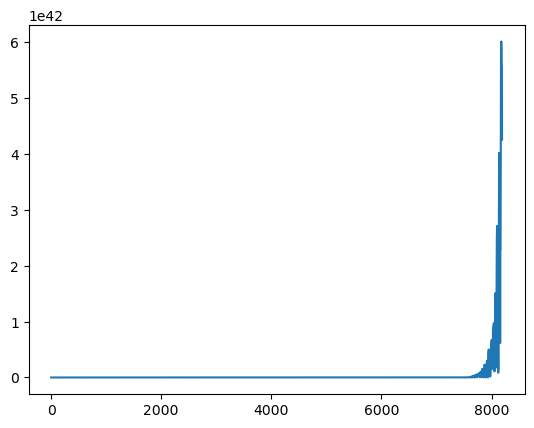

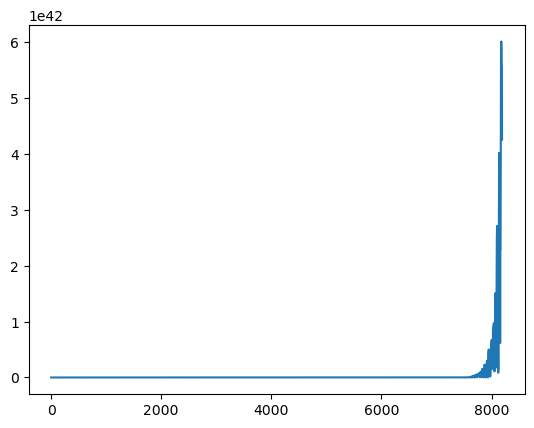

In [137]:
plt.plot(abs(ut[:, 1, 0]))
plt.show()
plt.plot(abs(ut[:, 0, 1]))
plt.show()